In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
col_names = [
    "id",
    "diagnosis",
    "radius_mean",
    "texture_mean",
    "perimeter_mean",
    "area_mean",
    "smoothness_mean",
    "compactness_mean",
    "concavity_mean",
    "concave points_mean",
    "symmetry_mean",
    "fractal_dimension_mean",
    "radius_se",
    "texture_se",
    "perimeter_se",
    "area_se",
    "smoothness_se",
    "compactness_se",
    "concavity_se",
    "concave points_se",
    "symmetry_se",
    "fractal_dimension_se",
    "radius_worst",
    "texture_worst",
    "perimeter_worst",
    "area_worst",
    "smoothness_worst",
    "compactness_worst",
    "concavity_worst",
    "concave points_worst",
    "symmetry_worst",
    "fractal_dimension_worst",
]

In [3]:
df = pd.read_csv("../data/raw/wdbc.data", header=None, names=col_names)
print(df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
print(df.isnull().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


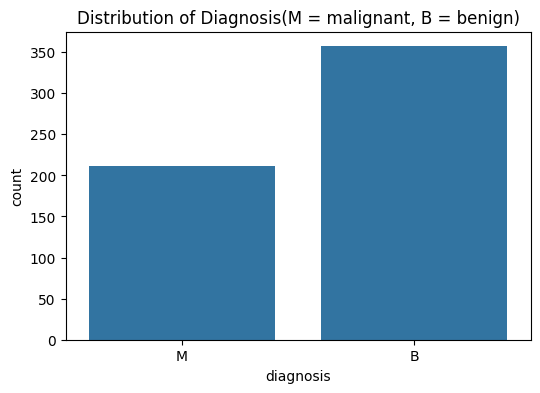

In [6]:
plt.figure(figsize=(6, 4))
sns.countplot(x="diagnosis", data=df)
plt.title("Distribution of Diagnosis(M = malignant, B = benign)")
plt.show()

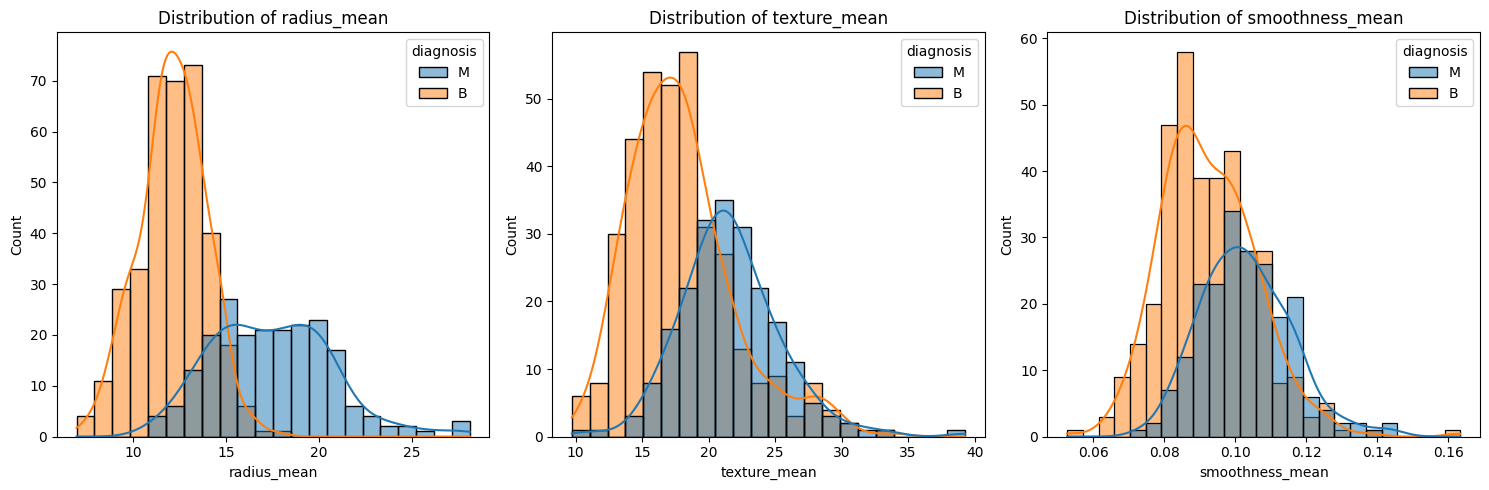

In [7]:
features_to_plot = ['radius_mean', 'texture_mean', 'smoothness_mean']

plt.figure(figsize=(15, 5))
for i, feature in enumerate(features_to_plot):
    plt.subplot(1, 3, i + 1)
    sns.histplot(data=df, x=feature, hue='diagnosis', kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

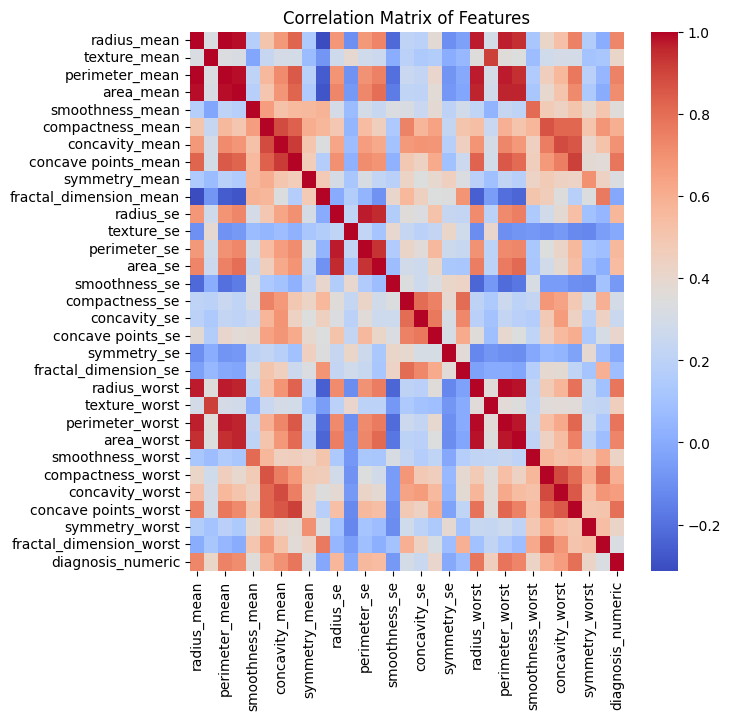

In [8]:
# Convert diagnosis to a numerical value for correlation (M=1, B=0)
df['diagnosis_numeric'] = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

# Calculate the correlation matrix
# We drop id and the original diagnosis column
corr_matrix = df.drop(['id', 'diagnosis'], axis=1).corr()

plt.figure(figsize=(7, 7))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

## Performing Data pre-processing

In [9]:
# --- Initial Data Cleaning ---
# The 'id' column is not a predictive feature, so we drop it.
df_cleaned = df.drop('id', axis=1)

print("--- Data Head After Dropping ID ---")
print(df_cleaned.head())
print("\n" + "="*50 + "\n")

--- Data Head After Dropping ID ---
  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  texture_worst  perimeter_worst  area_worst  \
0         0.2419 

In [10]:
# --- Encode the Target Variable ---
# The 'diagnosis' column is categorical (M/B) and needs to be converted to a numerical format.
# We will use LabelEncoder to map 'B' (Benign) to 0 and 'M' (Malignant) to 1.
le = LabelEncoder()
df_cleaned['diagnosis'] = le.fit_transform(df_cleaned['diagnosis'])

print("--- Data Head After Encoding Diagnosis (M=1, B=0) ---")
print(df_cleaned.head())
print(f"Diagnosis classes encoded as: {le.classes_}")
print("\n" + "="*50 + "\n")

--- Data Head After Encoding Diagnosis (M=1, B=0) ---
   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  texture_worst  perimeter_worst  area_wo

In [11]:
# --- Separate Features (X) and Target (y) ---
# 'X' will contain all the feature columns, and 'y' will contain the target column.
# CRITICAL FIX: Drop 'diagnosis_numeric' to prevent data leakage.
X = df_cleaned.drop(['diagnosis', 'diagnosis_numeric'], axis=1)
y = df_cleaned['diagnosis']

print("--- Shapes of Feature Matrix (X) and Target Vector (y) ---")
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")
print("\n" + "="*50 + "\n")

--- Shapes of Feature Matrix (X) and Target Vector (y) ---
Shape of X: (569, 30)
Shape of y: (569,)




In [12]:
# --- Split Data into Training and Testing Sets ---
# We split the data to train the model on one subset and evaluate it on another, unseen subset.
# 'test_size=0.2' means 20% of the data will be for testing.
# 'stratify=y' ensures the proportion of malignant to benign cases is the same in both sets.
# 'random_state=42' ensures the split is the same every time, for reproducibility.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("--- Shapes of Training and Testing Sets ---")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print("\n" + "="*50 + "\n")

--- Shapes of Training and Testing Sets ---
X_train shape: (455, 30)
X_test shape: (114, 30)
y_train shape: (455,)
y_test shape: (114,)




In [13]:
# --- Scale the Features ---
# Feature scaling is crucial for many ML algorithms. StandardScaler standardizes features
# by removing the mean and scaling to unit variance.
# IMPORTANT: We fit the scaler ONLY on the training data to prevent data leakage from the test set.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# For better readability, convert the scaled arrays back to DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

In [14]:
# --- Verification ---
# Check the first few rows of the scaled training data.
print("--- Head of SCALED Training Data (X_train_scaled) ---")
print(X_train_scaled.head())
print("\n" + "="*50 + "\n")

# Verify that the mean is close to 0 and the standard deviation is close to 1 for the scaled training data.
print("--- Mean and Standard Deviation of Scaled Training Data ---")
print(X_train_scaled.describe().loc[['mean', 'std']].round(2))
print("\nPreprocessing complete. The data is now ready for model training.")

--- Head of SCALED Training Data (X_train_scaled) ---
   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     0.518559      0.891826        0.424632   0.383925        -0.974744   
1    -0.516364     -1.639710       -0.541349  -0.542961         0.476219   
2    -0.368118      0.455515       -0.388250  -0.402970        -1.432979   
3     0.205285      0.726168        0.400330   0.070612         0.243253   
4     1.243005      0.194195        1.210377   1.206652        -0.111442   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0         -0.689772       -0.688586            -0.398175      -1.039155   
1         -0.631834       -0.604281            -0.303075       0.521543   
2         -0.383927       -0.342175            -0.765459      -0.850857   
3          2.203585        2.256094             1.213233       0.818474   
4          0.051348        0.732962             0.713767      -0.427187   

   fractal_dimension_mean  ...  radius

## Initial Model Training

--- Logistic Regression Results ---
Accuracy: 0.9649

Classification Report:
               precision    recall  f1-score   support

      Benign       0.96      0.99      0.97        72
   Malignant       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



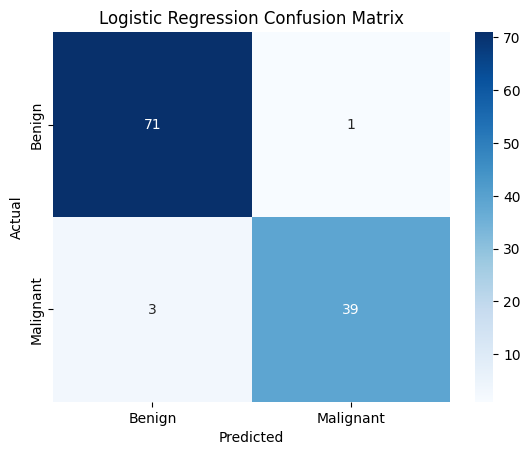

In [15]:
# Import models and evaluation metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --- Model 1: Logistic Regression ---
print("--- Logistic Regression Results ---")
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_lr = log_reg.predict(X_test_scaled)

# Evaluate performance
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred_lr, target_names=['Benign', 'Malignant']))

# Visualize the Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()


--- k-Nearest Neighbors (kNN) Results ---
Accuracy: 0.9561

Classification Report:
               precision    recall  f1-score   support

      Benign       0.95      0.99      0.97        72
   Malignant       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



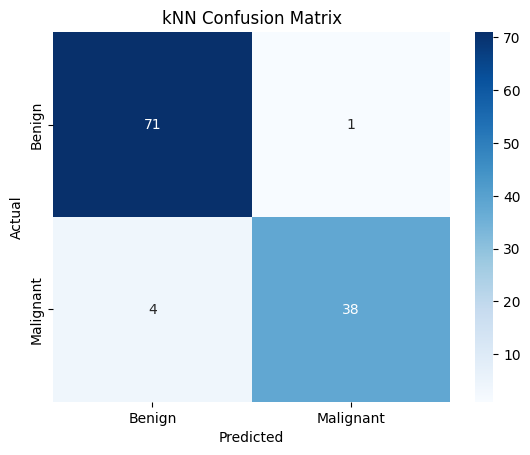

In [16]:
# --- Model 2: k-Nearest Neighbors (kNN) ---
print("\n--- k-Nearest Neighbors (kNN) Results ---")
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

# Evaluate performance
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred_knn, target_names=['Benign', 'Malignant']))

# Visualize the Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('kNN Confusion Matrix')
plt.show()